In [760]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTACIÓN DE LIBRERÍAS

In [1241]:
#importamos librerías
import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import plotly.express as px

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

!conda install pydot -y
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.tree import export_graphviz
import graphviz


from yellowbrick.classifier import ROCAUC

/bin/bash: conda: command not found


#IMPORTACIÓN DE DATOS

Cargamos el dataset para el training


In [762]:
df_train = pd.read_csv("/content/drive/MyDrive/COMPETICION JOBARCELONA´22/train.csv", sep=",", error_bad_lines = False, low_memory=False, index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [763]:
df_train .head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [764]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               7001 non-null   int64  
 1   Minutes            7001 non-null   int64  
 2   Sensor_alpha       7001 non-null   float64
 3   Sensor_beta        7001 non-null   float64
 4   Sensor_gamma       7001 non-null   float64
 5   Sensor_alpha_plus  7001 non-null   float64
 6   Sensor_beta_plus   7001 non-null   float64
 7   Sensor_gamma_plus  7001 non-null   float64
 8   Insect             7001 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 547.0 KB


Cargamos el dataset para el test para observarlo





In [1582]:
df_test = pd.read_csv("/content/drive/MyDrive/COMPETICION JOBARCELONA´22/test_x.csv", sep=",", error_bad_lines = False, low_memory=False, index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [1583]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 7000 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               3000 non-null   int64  
 1   Minutes            3000 non-null   int64  
 2   Sensor_alpha       3000 non-null   float64
 3   Sensor_beta        3000 non-null   float64
 4   Sensor_gamma       3000 non-null   float64
 5   Sensor_alpha_plus  3000 non-null   float64
 6   Sensor_beta_plus   3000 non-null   float64
 7   Sensor_gamma_plus  3000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 210.9 KB


In [767]:
df_test.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616


Una vez cargados los datos podemos empezar el análisis exploratorio

#DATA UNDERSTANDING

##1 Tamaño del data set

Vemos la distribución de las variables que tenemos, así como el tipo de variable que son.

In [769]:
df_train.info(verbose = False
                )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Columns: 9 entries, Hour to Insect
dtypes: float64(6), int64(3)
memory usage: 547.0 KB


In [770]:
df_train.shape

(7001, 9)

##2 Visualización directa de los datos

##3 Tipo de atributos

Ahora haremos un análisis más específico de los atributos disponibles

In [776]:
df_train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Columns: 9 entries, Hour to Insect
dtypes: float64(6), int64(3)
memory usage: 547.0 KB


In [777]:
df_train.select_dtypes(include = ["number"]).T

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
Hour,22.000000,10.000000,21.000000,21.000000,18.000000,21.000000,21.000000,7.000000,20.000000,21.000000,...,21.000000,20.000000,21.000000,21.000000,20.000000,21.000000,18.000000,22.000000,18.000000,21.000000
Minutes,26.000000,16.000000,42.000000,17.000000,16.000000,23.000000,10.000000,34.000000,12.000000,1.000000,...,48.000000,7.000000,22.000000,14.000000,8.000000,0.000000,57.000000,47.000000,14.000000,31.000000
Sensor_alpha,119.910995,-90.790536,-20.028003,-21.258567,-58.154501,-46.761031,108.268101,-103.673329,-146.492155,-60.924066,...,-13.366860,55.595621,-33.147444,-20.563368,-39.382006,6.576106,-6.169382,-7.289684,-92.317105,-72.083585
Sensor_beta,242.838324,-269.470767,-147.070212,0.467070,-13.051195,237.863074,-26.196569,-234.696711,12.444229,-66.598591,...,-76.755189,99.185744,-153.539698,-32.423407,52.839192,301.050638,-317.652257,-406.732525,-191.555040,-11.434977
Sensor_gamma,-316.819222,-182.581844,50.280872,-86.164153,-156.501167,208.008700,-96.568491,-103.499400,-42.473037,-63.173520,...,-39.744548,-52.000605,41.306153,-159.475454,-24.548637,146.682819,-161.644320,-212.097250,88.371271,-52.961743
Sensor_alpha_plus,250.195048,95.394941,-90.750386,-21.813529,48.392938,-125.729185,117.432706,98.081187,60.356941,-104.830957,...,-167.618164,-103.412701,-23.156436,49.764046,106.791797,-209.480741,248.055724,248.745127,38.728565,-72.696385
Sensor_beta_plus,-53.547777,37.291944,-50.476556,-209.256006,-110.008860,-33.298749,-96.707760,-28.156253,-73.822742,123.155306,...,249.757385,1.506748,-213.578373,63.920093,95.658834,-129.776336,-112.626344,116.893077,-39.050466,145.299227
Sensor_gamma_plus,-112.049983,48.525180,85.399009,16.291882,-10.285138,-1.362840,70.639947,45.068583,-31.022915,158.866955,...,-50.300485,3.260006,32.239747,-7.179916,-120.334880,-51.226256,99.463913,32.806150,20.356711,-143.856243
Insect,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


Todas las variables son numéricas.

##4 Estadísticos descriptivos

In [778]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,7001.0,19.598914,3.507008,1.000000,19.000000,21.000000,21.000000,23.000000
Minutes,7001.0,29.405942,17.375830,0.000000,14.000000,29.000000,44.000000,59.000000
Sensor_alpha,7001.0,0.477171,99.294856,-404.898823,-68.573905,-0.287447,66.480795,351.256221
Sensor_beta,7001.0,-29.974117,133.095125,-656.272666,-116.060383,-36.171567,56.637778,518.395878
Sensor_gamma,7001.0,-5.624690,115.871391,-448.478039,-83.508747,-1.217606,76.870277,378.349287
Sensor_alpha_plus,7001.0,7.188060,122.327980,-437.205393,-79.496687,-1.133567,93.285286,462.556319
Sensor_beta_plus,7001.0,-0.757901,100.039477,-387.567443,-68.061596,-0.444124,66.181909,345.279240
Sensor_gamma_plus,7001.0,-0.554533,100.535951,-374.961689,-69.652647,0.027128,67.838524,363.682391
Insect,7001.0,0.595772,0.661604,0.000000,0.000000,0.000000,1.000000,2.000000


## 5 Ver número de valores nulos

In [780]:
df_train.isnull().sum()

Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

No hay nulos, no habrá que hacer ningún tratamiento de nulos.

## 6 Análisis del target. Distribución/rango de valores

In [781]:
df_train.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [782]:
df_train["Insect"].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

0- Lepidoptero

1- Himenoptera

2- Diptera

Vemos que el dataset está desbalanceado, por cuanto una clase (2) está claramente subrepresentada. Esto podría afectar a la construcción del modelo predictivo.

Ahora vamos a ver si Hour y Minutes aportan información relevante para diferencias las clases?

In [ ]:
df_train[df_train ["Insect"]== 0][["Hour", "Minutes"]].describe()

In [ ]:
df_train[df_train ["Insect"]== 1][["Hour", "Minutes"]].describe()

In [ ]:
df_train[df_train ["Insect"]== 2][["Hour", "Minutes"]].describe()

In [786]:
df_train["Insect"].isnull().sum()

0

El target no tiene nulos

In [787]:
TARGET = "Insect"

In [788]:
df_train[TARGET].count()

7001

Comprobamos la distribución del target de forma gráfica

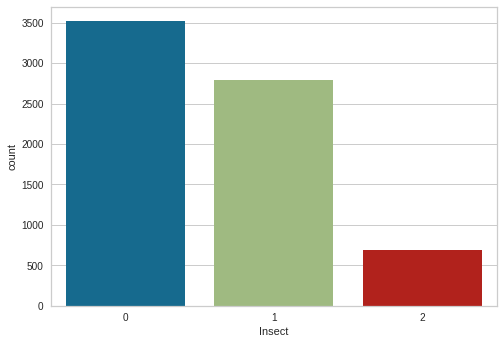

In [789]:
#plt.figure(figsize= (15,5))
#px.histogram(df_malware, x= TARGET)
sns.countplot(data=df_train, x=TARGET)

In [790]:
df_train[TARGET].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

##7 Eliminación de outliers


Los decision trees no sufren con los outliers, por eso esta vez no vamos a eliminarlos

##8 Tratamiento de nulos

In [791]:
df_train.isnull().sum()

Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

Vemos que no hay nulos, por lo tanto no habrá que hacer ningún tratamiento

##9 Correlación de variables con el target

In [792]:
df_train.select_dtypes(include = ["number"]).T


,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
Hour,22.000000,10.000000,21.000000,21.000000,18.000000,21.000000,21.000000,7.000000,20.000000,21.000000,...,21.000000,20.000000,21.000000,21.000000,20.000000,21.000000,18.000000,22.000000,18.000000,21.000000
Minutes,26.000000,16.000000,42.000000,17.000000,16.000000,23.000000,10.000000,34.000000,12.000000,1.000000,...,48.000000,7.000000,22.000000,14.000000,8.000000,0.000000,57.000000,47.000000,14.000000,31.000000
Sensor_alpha,119.910995,-90.790536,-20.028003,-21.258567,-58.154501,-46.761031,108.268101,-103.673329,-146.492155,-60.924066,...,-13.366860,55.595621,-33.147444,-20.563368,-39.382006,6.576106,-6.169382,-7.289684,-92.317105,-72.083585
Sensor_beta,242.838324,-269.470767,-147.070212,0.467070,-13.051195,237.863074,-26.196569,-234.696711,12.444229,-66.598591,...,-76.755189,99.185744,-153.539698,-32.423407,52.839192,301.050638,-317.652257,-406.732525,-191.555040,-11.434977
Sensor_gamma,-316.819222,-182.581844,50.280872,-86.164153,-156.501167,208.008700,-96.568491,-103.499400,-42.473037,-63.173520,...,-39.744548,-52.000605,41.306153,-159.475454,-24.548637,146.682819,-161.644320,-212.097250,88.371271,-52.961743
Sensor_alpha_plus,250.195048,95.394941,-90.750386,-21.813529,48.392938,-125.729185,117.432706,98.081187,60.356941,-104.830957,...,-167.618164,-103.412701,-23.156436,49.764046,106.791797,-209.480741,248.055724,248.745127,38.728565,-72.696385
Sensor_beta_plus,-53.547777,37.291944,-50.476556,-209.256006,-110.008860,-33.298749,-96.707760,-28.156253,-73.822742,123.155306,...,249.757385,1.506748,-213.578373,63.920093,95.658834,-129.776336,-112.626344,116.893077,-39.050466,145.299227
Sensor_gamma_plus,-112.049983,48.525180,85.399009,16.291882,-10.285138,-1.362840,70.639947,45.068583,-31.022915,158.866955,...,-50.300485,3.260006,32.239747,-7.179916,-120.334880,-51.226256,99.463913,32.806150,20.356711,-143.856243
Insect,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


Vamos a comprobar si alguna de las variables está altamente correlacionada, y por lo tanto puede ser repetitiva en cuánto a la información que aporte al modelo final. Si se encontrara alguna, se podría eliminar.

In [793]:
corr = df_train.corr()

In [794]:
corr_final = corr.style.background_gradient(cmap="coolwarm")

In [795]:
corr_final

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
Hour,1.000000,-0.010428,-0.004315,0.052001,0.008003,-0.070914,-0.011380,0.003773,0.085208
Minutes,-0.010428,1.000000,-0.006835,-0.011605,0.027355,0.015953,-0.004444,-0.021566,-0.011447
Sensor_alpha,-0.004315,-0.006835,1.000000,0.022326,0.006586,-0.018265,0.017574,0.004248,0.008430
Sensor_beta,0.052001,-0.011605,0.022326,1.000000,0.104676,-0.512785,0.010635,-0.022064,0.366754
Sensor_gamma,0.008003,0.027355,0.006586,0.104676,1.000000,-0.005966,0.018890,0.000970,-0.121449
Sensor_alpha_plus,-0.070914,0.015953,-0.018265,-0.512785,-0.005966,1.000000,-0.006376,0.015937,-0.397456
Sensor_beta_plus,-0.011380,-0.004444,0.017574,0.010635,0.018890,-0.006376,1.000000,0.017376,0.000202
Sensor_gamma_plus,0.003773,-0.021566,0.004248,-0.022064,0.000970,0.015937,0.017376,1.000000,-0.001430
Insect,0.085208,-0.011447,0.008430,0.366754,-0.121449,-0.397456,0.000202,-0.001430,1.000000


Vemos que la variable más correlacionada con el TARGET es "Sensor_beta"

Por lo demás no hay variables altamente correlacionadas con otras, es decir que no añadirán información adicional al modelo, con lo cual contaremos con todas las variables a la hora de pasarlas al modelo.

##10 Visualización gráfica de las distribuciones

- HISTOGRAMA, para ver la distribución de cada variable.

- BOXPLOT, para comparar la variable con el TARGET.

In [796]:
df_train.select_dtypes(include = ["number"]).describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,7001.0,19.598914,3.507008,1.000000,19.000000,21.000000,21.000000,23.000000
Minutes,7001.0,29.405942,17.375830,0.000000,14.000000,29.000000,44.000000,59.000000
Sensor_alpha,7001.0,0.477171,99.294856,-404.898823,-68.573905,-0.287447,66.480795,351.256221
Sensor_beta,7001.0,-29.974117,133.095125,-656.272666,-116.060383,-36.171567,56.637778,518.395878
Sensor_gamma,7001.0,-5.624690,115.871391,-448.478039,-83.508747,-1.217606,76.870277,378.349287
Sensor_alpha_plus,7001.0,7.188060,122.327980,-437.205393,-79.496687,-1.133567,93.285286,462.556319
Sensor_beta_plus,7001.0,-0.757901,100.039477,-387.567443,-68.061596,-0.444124,66.181909,345.279240
Sensor_gamma_plus,7001.0,-0.554533,100.535951,-374.961689,-69.652647,0.027128,67.838524,363.682391
Insect,7001.0,0.595772,0.661604,0.000000,0.000000,0.000000,1.000000,2.000000


In [797]:
df_train.columns

Index(['Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect'],
      dtype='object')

Sensor_gamma_plus

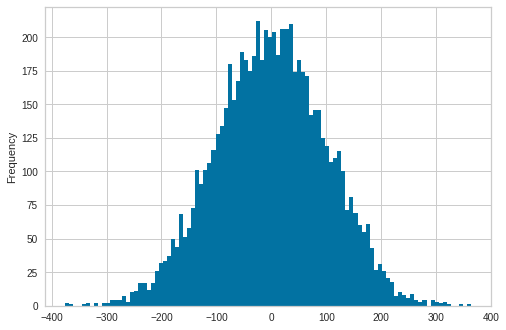

In [798]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_gamma_plus"].plot(kind = "hist", bins = 100)

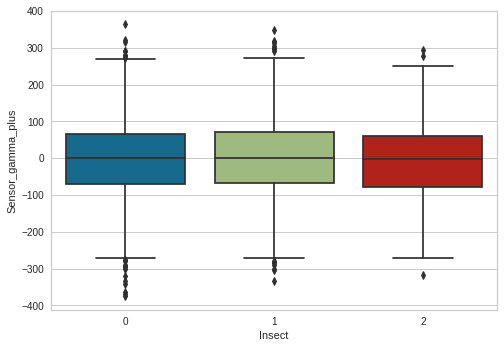

In [799]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_gamma_plus")


Sensor_beta_plus

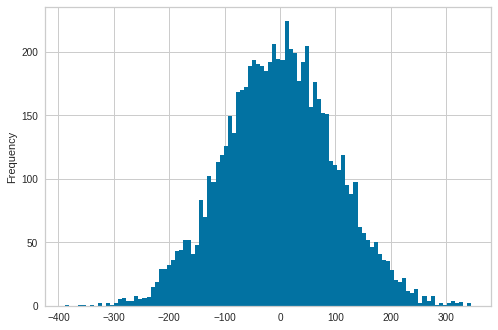

In [800]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_beta_plus"].plot(kind = "hist", bins = 100)

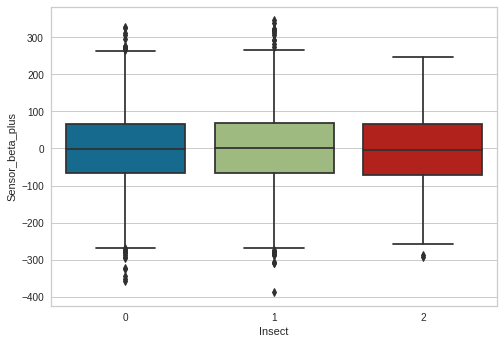

In [801]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_beta_plus")


Sensor_alpha_plus

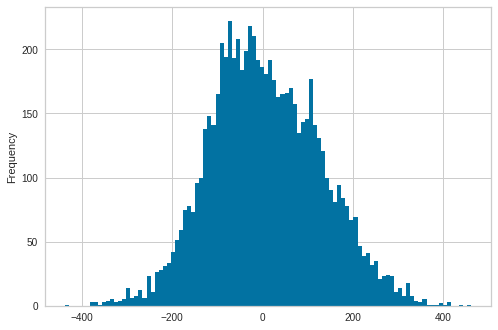

In [802]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_alpha_plus"].plot(kind = "hist", bins = 100)

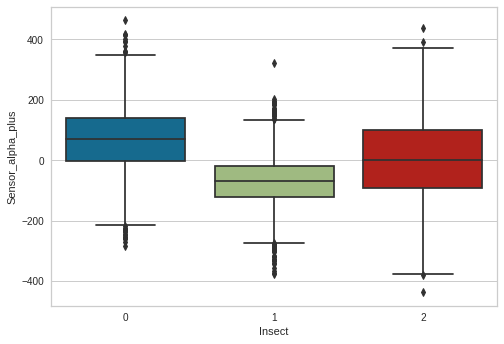

In [803]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_alpha_plus")


Sensor_gamma

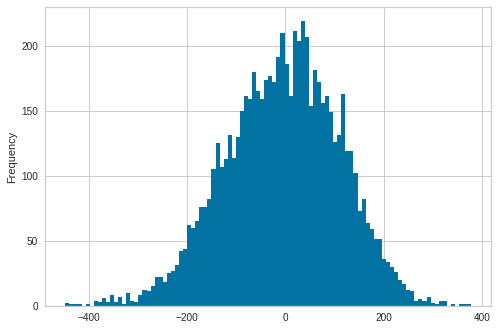

In [804]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_gamma"].plot(kind = "hist", bins = 100)

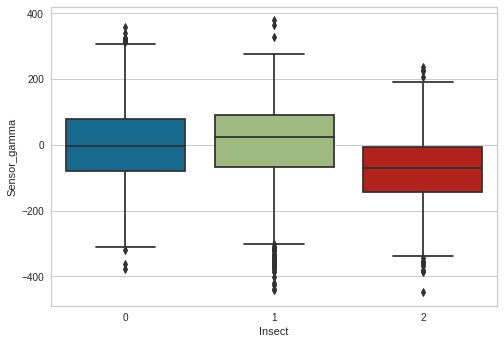

In [805]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_gamma")


Sensor_beta

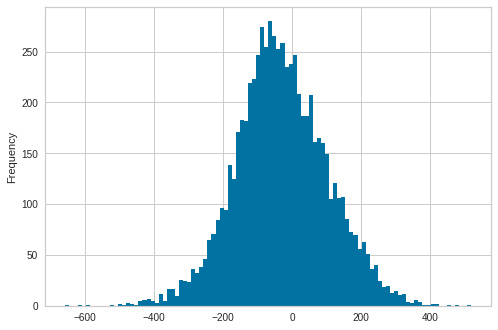

In [806]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_beta"].plot(kind = "hist", bins = 100)

Es la variable con una distribución más normal

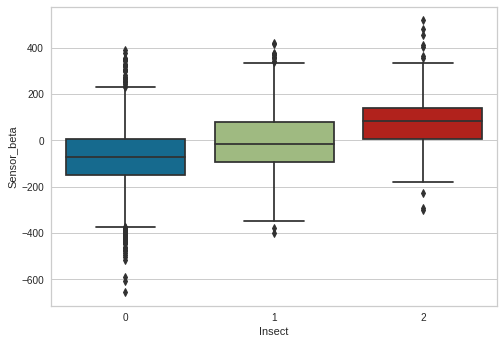

In [807]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_beta")


Sensor_alpha

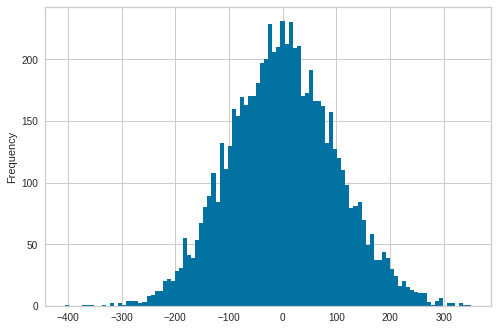

In [808]:
#HISTOGRAMA. Ver su distribución.
df_train["Sensor_alpha"].plot(kind = "hist", bins = 100)

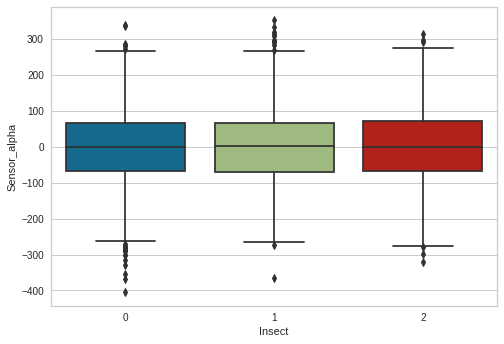

In [809]:
#BOXPLOT, con boxplot se compara la variable con el TARGET
sns.boxplot(data = df_train , x= TARGET, y = "Sensor_alpha")


#DATA PREPARATION


##1 Limpieza de atributos

1.1 Ajuste de tipo de datos

In [810]:
#VER LOS DUPLICADOS
#Me da todos los duplicados.
df_train[df_train.duplicated(keep=False)]

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect


No hay duplicados

1.2 Imputación de valores nulos(cero, media, moda, valor fijo, etc.), o eliminación de los registros que los contengan

No hay nada que imputar puesto que no hay nulos.

##2 Transformación de atributos

Trataremos las columnas Hour y Minutes

In [811]:
df_train.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [812]:
#Uniremos Hour y Minutes, y la convertiremos a datetime.
"""df_train["Time"] = (pd.to_datetime(df_train['Hour'].astype(str) + ':' + df_train['Minutes'].astype(str), format='%H:%M')
          .dt.time)"""

'df_train["Time"] = (pd.to_datetime(df_train[\'Hour\'].astype(str) + \':\' + df_train[\'Minutes\'].astype(str), format=\'%H:%M\')\n          .dt.time)'

In [813]:
#Vamos a eliminar Hour y Minutes porque parece que no aportan al modelo, tal y como hemos visto antes
df_train.drop (["Hour", "Minutes"], axis = 1, inplace = True)

# MLC4. Modelling

En este punto iniciamos con la fase de modelización, que ocupa los pasos de generación de la estrategia de validación, el entrenamiento del modelo y el desarrollo de predicciones y la validación de éstas. 

### 4.1 Train / Test Split

Para ello utilizaremos los scikits de estrategias de validación y selección de modelos **model_selection** y métricas de validación **metrics**. 

Ya los hemos importado anteriormente

#### Generación de la partición de validación y development

In [1254]:
dev_df = df_train.iloc[:5000, :]

In [ ]:
dev_df.info()

In [1259]:
dev_df.shape

(5000, 7)

In [1255]:
val_df = df_train.iloc[5000:, :]

In [1257]:
val_df.shape

(2001, 7)

La suma de los shapes es 7001, que es el total de las observaciones

In [1260]:
 2001+ 3000

5001

Una vez realizada la selección de particiones, vamos a asignar los atributos y el target a las variables X e y, respectivamente.\
Para seleccionar, utilizaremos el método Drop sin el atributo inplace y haciendo asignación y la indexación directa.

In [1261]:
dev_df_X = dev_df.drop('Insect', axis=1)
dev_df_y = dev_df[['Insect']]

In [1262]:
val_df_X = val_df.drop('Insect', axis=1)
val_df_y = val_df[['Insect']]

Hacemos una comprobación

In [1263]:
dev_df_X.head().T
#Vemos que la columna Insect ya no está

,0,1,2,3,4
Sensor_alpha,119.910995,-90.790536,-20.028003,-21.258567,-58.154501
Sensor_beta,242.838324,-269.470767,-147.070212,0.467070,-13.051195
Sensor_gamma,-316.819222,-182.581844,50.280872,-86.164153,-156.501167
Sensor_alpha_plus,250.195048,95.394941,-90.750386,-21.813529,48.392938
Sensor_beta_plus,-53.547777,37.291944,-50.476556,-209.256006,-110.008860
Sensor_gamma_plus,-112.049983,48.525180,85.399009,16.291882,-10.285138


Vemos que la columna Insect ya no está

In [1264]:
dev_df_y.head().T

,0,1,2,3,4
Insect,2,0,1,0,2


Y que la partición de entrenamiento y tiene el target (las clases)

In [1267]:
val_df_X.head().T
#Vemos que la columna Insect ya no está

,5000,5001,5002,5003,5004
Sensor_alpha,165.959093,28.854234,-112.427873,-26.396727,4.260985
Sensor_beta,-6.970415,19.892505,10.410879,25.118826,38.542805
Sensor_gamma,30.311623,44.466920,5.317877,-28.790005,76.083572
Sensor_alpha_plus,54.899814,126.922641,136.953971,50.636446,-58.284849
Sensor_beta_plus,-74.785403,21.225569,95.572714,-68.199438,-196.309611
Sensor_gamma_plus,-217.100364,31.496458,109.789760,-60.110984,57.348196


Vemos que la columna Insect ya no está

In [1266]:
val_df_y.head().T

,5000,5001,5002,5003,5004
Insect,0,0,0,0,1


Y que la partición de validación y tiene el target (las clases)

#### Random Holdout. Hacemos la partición del development

In [1268]:
df_train[TARGET].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

Como las clases están un poco desbalanceadas, haremos un over sampling para pasar una muestra menor y mejor distribuida de las tres clases.

In [1269]:
from imblearn.over_sampling import SMOTE

In [1270]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [1271]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [1273]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1840 to 860
Columns: 6 entries, Sensor_alpha to Sensor_gamma_plus
dtypes: float64(6)
memory usage: 191.4 KB


In [1274]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1501 to 1912
Columns: 6 entries, Sensor_alpha to Sensor_gamma_plus
dtypes: float64(6)
memory usage: 82.0 KB


In [1275]:
y_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1840 to 860
Columns: 1 entries, Insect to Insect
dtypes: int64(1)
memory usage: 54.7 KB


In [1276]:
y_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1501 to 1912
Columns: 1 entries, Insect to Insect
dtypes: int64(1)
memory usage: 23.4 KB


Hacemos un describe sobre las nuevas variables

In [1277]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Sensor_alpha,3500.0,-0.135014,99.697817,-367.610815,-69.106364,0.327191,66.492311,339.206060
Sensor_beta,3500.0,-33.379193,130.578298,-609.633422,-117.257235,-39.539898,50.467605,482.189198
Sensor_gamma,3500.0,-6.355617,116.325086,-437.240073,-85.467865,-3.160123,74.612008,358.570603
Sensor_alpha_plus,3500.0,10.159933,121.184117,-437.205393,-75.926706,1.790872,95.599950,416.620810
Sensor_beta_plus,3500.0,-0.422508,99.885931,-358.457767,-67.326273,0.057831,67.315217,345.279240


In [1278]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Sensor_alpha,1500.0,1.951533,101.628321,-404.898823,-67.373304,-3.839977,66.756192,335.958476
Sensor_beta,1500.0,-19.030438,137.636011,-518.720176,-108.727874,-25.840770,75.935117,518.395878
Sensor_gamma,1500.0,-1.629327,116.035621,-403.239599,-80.192025,3.667333,81.174788,378.349287
Sensor_alpha_plus,1500.0,0.860409,124.244703,-381.191190,-86.630772,-8.747985,87.733546,413.896548
Sensor_beta_plus,1500.0,-3.697676,100.718139,-322.380996,-70.700810,-4.519712,61.439269,328.253906


In [1279]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Insect,3500.0,0.582571,0.654122,0.0,0.0,0.0,1.0,2.0


In [1280]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Insect,1500.0,0.603333,0.66404,0.0,0.0,1.0,1.0,2.0


### 4.2 Definición del modelo



A continuación, y para entrenar el modelo utilizaremos siempre el mismo procedimiento
- Instanciar el modelo (definir los parámetros)
- Realizar el entrenamiento (inducción de las reglas concretas a partir de los datos)
- Predecir (calcular la probabilidad de retraso sobre un dataset nuevo, test, que nos permita medir la bonanza del modelo)

#### DecisionTreeClassifier

DecisionTreeClassifier

In [1632]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=3, # Importante, regulará el sobreajuste
                         min_samples_split=500,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )


Le hemos puesto una profundidad de 3 para empezar.

In [1633]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=3, min_samples_split=500, random_state=42)

Una vez generado el árbol, podemos pasar a visualizarlo con export_graphviz.

In [1283]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['Insect_0', 'Insect_1', "Insect_2"],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

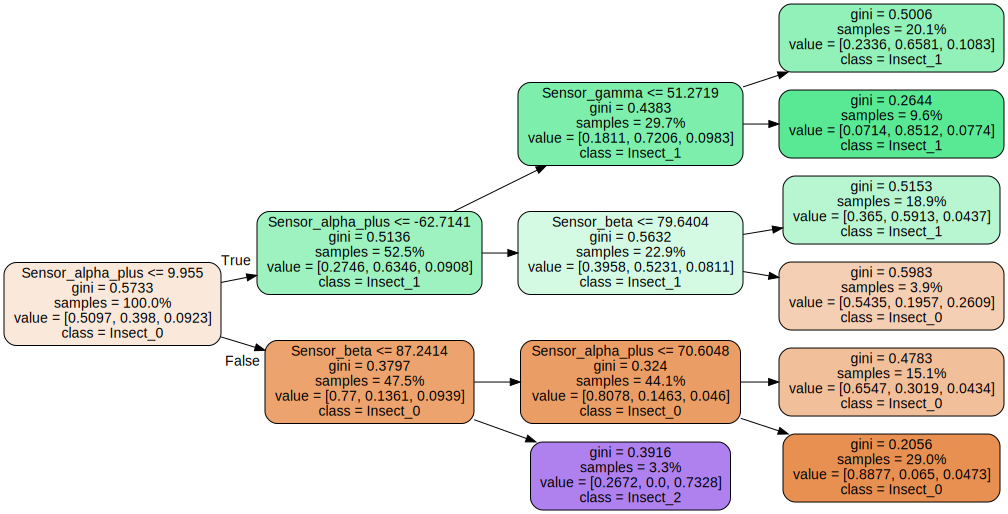

In [1284]:
graph = graphviz.Source(dot_data)
graph

Podemos hacer un análisis unidimensional de esta variable con las técnicas que hemos visto antes. 

Sensor alpha plus

In [853]:
df_train.head()

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [854]:
df_train["Sensor_alpha_plus"].value_counts()

 250.195048    1
-39.567681     1
-37.526827     1
-48.303959     1
 62.949590     1
              ..
-63.640490     1
-75.457359     1
-62.464783     1
-37.969565     1
-72.696385     1
Name: Sensor_alpha_plus, Length: 7001, dtype: int64

In [855]:
df_train["Sensor_alpha_plus"].describe()

count    7001.000000
mean        7.188060
std       122.327980
min      -437.205393
25%       -79.496687
50%        -1.133567
75%        93.285286
max       462.556319
Name: Sensor_alpha_plus, dtype: float64

In [1285]:
val = dt.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.725636722074876

#### Random Forest

In [1286]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=8, min_samples_split=500, random_state=42)

In [1287]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['DetectionsScore'])

In [1288]:
results_df = y_test.join(y_score)

In [1289]:
results_df.head(10)

,Insect,DetectionsScore
1501,0,0.416415
2586,1,0.656382
2653,0,0.177152
1055,1,0.615750
705,0,0.511887
106,1,0.403221
589,1,0.703647
2468,0,0.096003
2413,0,0.118867
1600,1,0.551582


In [1290]:
val = rf.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.7003071124564345

#### XGBoost Classifier

In [1291]:
df_train

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...
6996,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


In [1292]:
# split train input and output data
X = df_train.drop(axis=0, columns=['Insect'])
Y = df_train["Insect"]

#Print the shape of X and Y
print(X.shape)
print(Y.shape)

(7001, 6)
(7001,)


In [1293]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [1294]:
df_train["Insect"].unique()

array([2, 0, 1])

In [1295]:
num_of_classes = len(df_train["Insect"].unique())

In [1296]:
# Create a classifier
xgb = XGBClassifier(booster='gbtree', objective='multi:softmax', 
                    max_depth = 20,  
                    random_state=42, eval_metric="auc", num_class=num_of_classes)


In [1297]:

# Fit the classifier with the training data
xgb.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBClassifier(eval_metric='auc', max_depth=20, num_class=3,
              objective='multi:softprob', random_state=42)

In [1298]:
# Use trained model to predict output of test dataset
val = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.8446152957286764

In [1299]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.head()

,Expected Output,Predicted Output
5760,1,1
2944,1,1
2024,0,0
263,1,0
4421,0,0


Con el Undersampler

In [1300]:
rus = RandomUnderSampler(random_state=0)
X_rus_train,y_rus_train = rus.fit_resample(X_train,y_train)
X_rus_test,y_rus_test = rus.fit_resample(X_test,y_test)

In [1301]:
num_of_classes = len(df_train["Insect"].unique())

In [1302]:
# Create a classifier
xgbrus = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=num_of_classes)


In [1303]:

# Fit the classifier with the training data
xgbrus.fit(X_rus_train,y_rus_train)

XGBClassifier(eval_metric='auc', num_class=3, objective='multi:softprob',
              random_state=42)

In [1304]:
# Use trained model to predict output of test dataset
val = xgbrus.predict(X_rus_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_rus_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.8261363636363637

In [1305]:
output = pd.DataFrame()
output['Expected Output'] = y_rus_test
output['Predicted Output'] = val
output.head()

,Expected Output,Predicted Output
0,0,0
1,0,2
2,0,1
3,0,0
4,0,0


In [1306]:
output["Expected Output"].value_counts()

0    220
1    220
2    220
Name: Expected Output, dtype: int64

In [1307]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Expected Output   660 non-null    int64
 1   Predicted Output  660 non-null    int64
dtypes: int64(2)
memory usage: 10.4 KB


In [1308]:
output["Success"] = output['Expected Output'] == output['Predicted Output'].astype(int)

In [1309]:
output.head()

,Expected Output,Predicted Output,Success
0,0,0,True
1,0,2,False
2,0,1,False
3,0,0,True
4,0,0,True


In [1310]:
output["Success"].value_counts()

True     507
False    153
Name: Success, dtype: int64

In [1311]:
val = xgb.predict(X_rus_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_rus_test)

y_test_lb = lb.transform(y_rus_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.8363636363636364

## 4.3 Evaluación del modelo. Decision Tree

#### Opción 1: a través de los resultados

In [1465]:
#y_test_pred = pd.DataFrame(dt.predict(X_rus_test), index=y_rus_test.index, columns=['Predicciones'])
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['Predicciones'])


In [1466]:
y_test_pred.head()

,Predicciones
4,0
16,1
34,1
64,0
98,1


In [1467]:
y_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4 to 4994
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Predicciones  500 non-null    int64
dtypes: int64(1)
memory usage: 24.0 KB


In [1468]:
y_test_pred.shape

(500, 1)

In [1469]:
y_test = pd.DataFrame(y_test)

In [1470]:
y_test

,Insect
4,2
16,0
34,0
64,0
98,0
...,...
4953,2
4985,1
4986,1
4992,1


In [1471]:
results_df = y_test.join(y_test_pred, how= 'inner')

In [1472]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4 to 4994
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Insect        500 non-null    int64
 1   Predicciones  500 non-null    int64
dtypes: int64(2)
memory usage: 27.9 KB


In [1473]:
results_df.head()

,Insect,Predicciones
4,2,0
16,0,1
34,0,1
64,0,0
98,0,1


In [1474]:
results_df["Insect"].value_counts()

0    261
1    191
2     48
Name: Insect, dtype: int64

In [1475]:
results_df['Success'] = (results_df['Insect'] == results_df['Predicciones']).astype(int)

In [1476]:
results_df.head()

,Insect,Predicciones,Success
4,2,0,0
16,0,1,0
34,0,1,0
64,0,0,1
98,0,1,0


In [1477]:
results_df['Success'].count()

500

In [1478]:
results_df['Success'].sum()

357

In [1479]:
results_df['Success'].mean()

0.714

In [1480]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 357 registros de un total de 500, por tanto el Accuracy es 0.714.


#### Opción 2: a través de la matriz de confusión

In [1481]:
confusion_matrix = pd.crosstab(results_df['Insect'], results_df['Predicciones'])

In [1482]:
confusion_matrix

Predicciones,0,1,2
Insect,,,
0,188,71,2
1,37,154,0
2,7,26,15


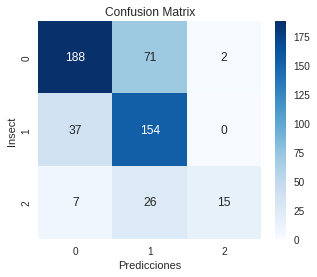

In [1483]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, fmt="d", cmap = "Blues", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Insect')
plt.xlabel('Predicciones')
plt.show()

Calculando el Positive predictive value for each class (PPV)

In [1572]:
PPV_0 = 188/(188+37+7)
PPV_0

0.8103448275862069

In [1573]:
PPV_1 = 154/(71+154+26)
PPV_1

0.6135458167330677

In [1574]:
PPV_2 = 15/(2+0+15)
PPV_2

0.8823529411764706

In [1487]:
confusion_matrix_porcentajes = pd.crosstab(results_df['Insect'], results_df['Predicciones'])/len(results_df["Insect"])*100

In [1488]:
confusion_matrix_porcentajes.round(2)

Predicciones,0,1,2
Insect,,,
0,37.6,14.2,0.4
1,7.4,30.8,0.0
2,1.4,5.2,3.0


#### Opción 3: Usando el módulo metrics

In [1489]:
metrics.accuracy_score(results_df['Insect'], results_df['Predicciones'])

0.714

#### Opción 4: Usando el modelo

In [1490]:
dt.score(X_test, y_test)

0.714

#### Prueba de diversas estrategias de validación

Vamos a probar distintas estrategias de parámetros

In [1491]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7051111111111111 - Test: 0.706
Profundidad del árbol: 2. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 3. Train: 0.7313333333333333 - Test: 0.736
Profundidad del árbol: 4. Train: 0.7564444444444445 - Test: 0.77
Profundidad del árbol: 5. Train: 0.794 - Test: 0.772
Profundidad del árbol: 6. Train: 0.8071111111111111 - Test: 0.784
Profundidad del árbol: 7. Train: 0.8331111111111111 - Test: 0.814
Profundidad del árbol: 8. Train: 0.8611111111111112 - Test: 0.81
Profundidad del árbol: 9. Train: 0.8822222222222222 - Test: 0.802
Profundidad del árbol: 10. Train: 0.9002222222222223 - Test: 0.802
Profundidad del árbol: 11. Train: 0.9193333333333333 - Test: 0.792
Profundidad del árbol: 12. Train: 0.9366666666666666 - Test: 0.796
Profundidad del árbol: 13. Train: 0.9526666666666667 - Test: 0.79
Profundidad del árbol: 14. Train: 0.9671111111111111 - Test: 0.794
Profundidad del árbol: 15. Train: 0.9755555555555555 - Test: 0.792
Profundidad del árbo

Vamos a probar con min_samples_split en 500, 1000 y 1500, para ver qué pasa

In [1492]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=500)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7051111111111111 - Test: 0.706
Profundidad del árbol: 2. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 3. Train: 0.7217777777777777 - Test: 0.732
Profundidad del árbol: 4. Train: 0.7415555555555555 - Test: 0.764
Profundidad del árbol: 5. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 6. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 7. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 8. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 9. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 10. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 11. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 12. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 13. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 14. Train: 0.7573333333333333 - Test: 0.756
Profundidad del árbol: 15. Train: 0.7573333333333333 - Test: 0.756
Prof

In [1493]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=1000)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7051111111111111 - Test: 0.706
Profundidad del árbol: 2. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 3. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 4. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 5. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 6. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 7. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 8. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 9. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 10. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 11. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 12. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 13. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 14. Train: 0.7388888888888889 - Test: 0.764
Profundidad del árbol: 15. Train: 0.7388888888888889 - Test: 0.764
Prof

In [1494]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=1500)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.7051111111111111 - Test: 0.706
Profundidad del árbol: 2. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 3. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 4. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 5. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 6. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 7. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 8. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 9. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 10. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 11. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 12. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 13. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 14. Train: 0.7191111111111111 - Test: 0.732
Profundidad del árbol: 15. Train: 0.7191111111111111 - Test: 0.732
Prof

#### Podemos medir la efectividad en el conjunto de validación del mejor estimador

In [1495]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=500)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=500, random_state=42)

In [1496]:
dt.score(X_train, y_train)

0.7217777777777777

In [1497]:
dt.score(X_test, y_test)

0.732

In [1498]:
dt.score(val_df_X, val_df_y)

0.7076461769115442

Observamos mejores resultados en la validación cuando aumentamos la profundidad, lo mismo para el score en training y test.

#### Podemos probar el k-fold como estrategia de validación

In [1499]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [1500]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    dt = DecisionTreeClassifier(max_depth=8, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.774, 0.792, 0.772, 0.788, 0.786, 0.824, 0.776, 0.818, 0.786, 0.81]

In [1501]:
np.mean(scores_list)

0.7926

In [1502]:
np.std(scores_list)

0.017573844200970922

In [1503]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42)

In [1504]:
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [1505]:
scores

array([0.774, 0.792, 0.772, 0.788, 0.786, 0.824, 0.776, 0.818, 0.786,
       0.81 ])

In [1506]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.793 (+/- 0.035)


## 4.4 Evaluación del modelo. Random Forest.

#### Opción 1: a través de los resultados

In [1507]:
#y_test_pred = pd.DataFrame(xgb.predict(X_rus_test), index=y_rus_test.index, columns=['Predicciones'])
y_test_pred = pd.DataFrame(rf.predict(X_test), index=y_test.index, columns=['Predicciones'])


In [1508]:
y_test_pred.head()

,Predicciones
4,0
16,0
34,0
64,0
98,0


In [1509]:
y_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4 to 4994
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Predicciones  500 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


In [1510]:
y_test_pred.shape

(500, 1)

In [1511]:
results_df = y_test.join(y_test_pred, how= 'inner')

In [1512]:
results_df.head()

,Insect,Predicciones
4,2,0
16,0,0
34,0,0
64,0,0
98,0,0


In [1513]:
results_df["Insect"].value_counts()

0    261
1    191
2     48
Name: Insect, dtype: int64

In [1514]:
results_df['Success'] = (results_df['Insect'] == results_df['Predicciones']).astype(int)

In [1515]:
results_df.head()

,Insect,Predicciones,Success
4,2,0,0
16,0,0,1
34,0,0,1
64,0,0,1
98,0,0,1


In [1516]:
results_df['Success'].count()

500

In [1517]:
results_df['Success'].sum()

360

In [1518]:
results_df['Success'].mean()

0.72

In [1519]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 360 registros de un total de 500, por tanto el Accuracy es 0.72.


#### Opción 2: a través de la matriz de confusión

In [1520]:
confusion_matrix = pd.crosstab(results_df['Insect'], results_df['Predicciones'])

In [1521]:
confusion_matrix

Predicciones,0,1,2
Insect,,,
0,207,54,0
1,46,145,0
2,17,23,8


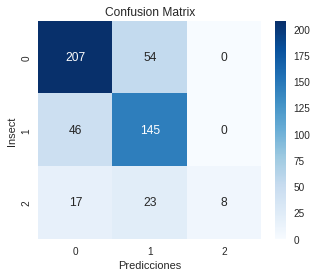

In [1522]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, fmt="d", cmap = "Blues", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Insect')
plt.xlabel('Predicciones')
plt.show()

Calculando el Positive predictive value for each class (PPV)

In [1575]:
PPV_0 = 207/(207+46+17)
PPV_0

0.7666666666666667

In [1576]:
PPV_1 = 145/(54+145+23)
PPV_1

0.6531531531531531

In [1577]:
PPV_2 = 8/(0+0+8)
PPV_2

1.0

In [1526]:
confusion_matrix_porcentajes = pd.crosstab(results_df['Insect'], results_df['Predicciones'])/len(results_df["Insect"])*100

In [1527]:
confusion_matrix_porcentajes.round(2)

Predicciones,0,1,2
Insect,,,
0,41.4,10.8,0.0
1,9.2,29.0,0.0
2,3.4,4.6,1.6


#### Opción 3: Usando el módulo metrics

In [1528]:
metrics.accuracy_score(results_df['Insect'], results_df['Predicciones'])

0.72

#### Opción 4: Usando el modelo

In [1529]:
rf.score(X_test, y_test)

0.72

#### Podemos medir la efectividad en el conjunto de validación del mejor estimador

In [1530]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=8, min_samples_split=500, n_estimators=200,
                       random_state=42)

In [1531]:
rf.score(X_train, y_train)

0.7384444444444445

In [1532]:
rf.score(X_test, y_test)

0.724

In [1533]:
rf.score(val_df_X, val_df_y)

0.711144427786107

#### Podemos probar el k-fold como estrategia de validación

In [1534]:
kf =  model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [1535]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
    rf.fit(X_train, y_train)
    _score = rf.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConv

[0.746, 0.726, 0.742, 0.734, 0.718, 0.722, 0.732, 0.754, 0.704, 0.72]

In [1536]:
np.mean(scores_list)

0.7298

In [1537]:
np.std(scores_list)

0.014126570709128256

In [1538]:
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [1539]:
scores

array([0.774, 0.792, 0.772, 0.788, 0.786, 0.824, 0.776, 0.818, 0.786,
       0.81 ])

In [1540]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.793 (+/- 0.035)


## 4.5 Evaluación del modelo. XGB Classifier.

#### Opción 1: a través de los resultados

In [1541]:
#y_test_pred = pd.DataFrame(xgbrus.predict(X_rus_test), index=y_rus_test.index, columns=['Predicciones'])
y_test_pred = pd.DataFrame(xgb.predict(X_test), index=y_test.index, columns=['Predicciones'])


In [1542]:
y_test_pred.head()

,Predicciones
4,2
16,0
34,0
64,0
98,0


In [1543]:
y_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4 to 4994
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Predicciones  500 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


In [1544]:
y_test_pred.shape

(500, 1)

In [1545]:
results_df = y_test.join(y_test_pred, how= 'inner')

In [1546]:
results_df.head()

,Insect,Predicciones
4,2,2
16,0,0
34,0,0
64,0,0
98,0,0


In [1547]:
results_df["Insect"].value_counts()

0    261
1    191
2     48
Name: Insect, dtype: int64

In [1548]:
results_df['Success'] = (results_df['Insect'] == results_df['Predicciones']).astype(int)

In [1549]:
results_df.head()

,Insect,Predicciones,Success
4,2,2,1
16,0,0,1
34,0,0,1
64,0,0,1
98,0,0,1


In [1550]:
results_df['Success'].count()

500

In [1551]:
results_df['Success'].sum()

496

In [1552]:
results_df['Success'].mean()

0.992

In [1553]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 496 registros de un total de 500, por tanto el Accuracy es 0.992.


#### Opción 2: a través de la matriz de confusión

In [1554]:
confusion_matrix = pd.crosstab(results_df['Insect'], results_df['Predicciones'])

In [1555]:
confusion_matrix

Predicciones,0,1,2
Insect,,,
0,257,4,0
1,0,191,0
2,0,0,48


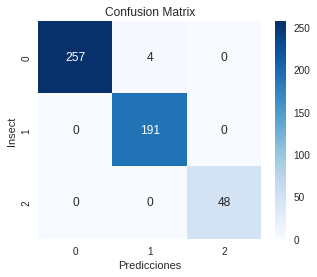

In [1556]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, fmt="d", cmap = "Blues", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Insect')
plt.xlabel('Predicciones')
plt.show()

Calculando el Positive predictive value for each class (PPV)

In [1578]:
PPV_0 = 257/(257+0+0)
PPV_0

1.0

In [1579]:
PPV_1 = 191/(4+191+0)
PPV_1

0.9794871794871794

In [1580]:
PPV_2 = 48/(0+0+48)
PPV_2

1.0

In [1560]:
confusion_matrix_porcentajes = pd.crosstab(results_df['Insect'], results_df['Predicciones'])/len(results_df["Insect"])*100

In [1561]:
confusion_matrix_porcentajes.round(2)

Predicciones,0,1,2
Insect,,,
0,51.4,0.8,0.0
1,0.0,38.2,0.0
2,0.0,0.0,9.6


#### Opción 3: Usando el módulo metrics

In [1562]:
metrics.accuracy_score(results_df['Insect'], results_df['Predicciones'])

0.992

#### Opción 4: Usando el modelo

In [1563]:
xgb.score(X_test, y_test)

0.992

Normalmente, usaremos esta forma (el score del modelo) por comodidad, pero es bueno ser capaces de generar los distintos métodos para obtener la puntuación para ver otros casos (por ejemplo, que tal han validado las días según mes) (No somos Noob, somos Pro). 

#### Podemos probar el k-fold como estrategia de validación

In [1564]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [1565]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', 
        random_state=42, eval_metric="auc", num_class=num_of_classes)
    xgb.fit(X_train, y_train)
    _score = xgb.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.808, 0.802, 0.82, 0.808, 0.806, 0.814, 0.81, 0.818, 0.77, 0.796]

In [1566]:
np.mean(scores_list)

0.8051999999999999

In [1567]:
np.std(scores_list)

0.013541048703848587

In [1569]:
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [1570]:
scores

array([0.774, 0.792, 0.772, 0.788, 0.786, 0.824, 0.776, 0.818, 0.786,
       0.81 ])

In [1571]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.793 (+/- 0.035)


# PREDICCIONES SOBRE TEST

Un
archivo 'results.csv'
con las predicciones de tu algoritmo al meterle como input el dataset test_x. Este archivo con los resultados ha de tener una columna con el índice y otra con las predicciones del 'Insect'.

In [1603]:
df_test.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616


In [1604]:
df_test.drop(["Hour", "Minutes"], axis = 1, inplace = True)

##Predicción con Decision Tree (dt)

In [1634]:
prediction = dt.predict(df_test)

In [1635]:
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [1636]:
prediction = pd.DataFrame(prediction)

In [1637]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [1638]:
prediction.rename(columns = {0:'Predicciones'}, inplace = True)


In [1639]:
prediction.head()

,Predicciones
0,1
1,1
2,0
3,2
4,1


In [1640]:
prediction["Predicciones"].value_counts()

1    1568
0    1303
2     129
Name: Predicciones, dtype: int64

In [1641]:
prediction.to_csv("Results_dt.csv")

In [1642]:
from google.colab import files
files.download ("Results_dt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Predicción con Random Forest (rf)

In [1614]:
prediction = rf.predict(df_test)

In [1615]:
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [1616]:
prediction = pd.DataFrame(prediction)

In [1617]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [1618]:
prediction.rename(columns = {0:'Predicciones'}, inplace = True)


In [1619]:
prediction.head()

,Predicciones
0,1
1,1
2,0
3,0
4,1


In [1620]:
prediction["Predicciones"].value_counts()

0    1526
1    1440
2      34
Name: Predicciones, dtype: int64

In [1621]:
prediction.to_csv("Results_rf.csv")

In [1622]:
from google.colab import files
files.download ("Results_rf.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Predicción con Extreme Gradient Boosting Classifier (xgb)

In [1623]:
prediction = xgb.predict(df_test)

In [1624]:
prediction

array([1, 1, 0, ..., 1, 0, 2])

In [1625]:
prediction = pd.DataFrame(prediction)

In [1626]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [1627]:
prediction.rename(columns = {0:'Predicciones'}, inplace = True)


In [1628]:
prediction.head()

,Predicciones
0,1
1,1
2,0
3,2
4,1


In [1629]:
prediction["Predicciones"].value_counts()

0    1469
1    1361
2     170
Name: Predicciones, dtype: int64

In [1630]:
prediction.to_csv("Results_xgb.csv")

In [1631]:
from google.colab import files
files.download ("Results_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>